# 00415602821 03915602821

### libraries required to import for the code 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Bifercation of Reading dataset
#### 1.Weight (carat): weight of the diamond.
#### 2.Length (x): length of the diamond
#### 3.Width (y): width of the diamond
#### 4.Depth (z): depth of the diamond.
#### 5.%Depth: depth percentage. Formula: z / mean(length, width) = 2 * depth / (length + width)
#### 6.Table: width of top of the diamond relative to the widest point.
#### 7.Quality: quality of the diamond. Possible values (from best to worst): ideal, premium, very good, good, fair
#### 8.Color: color of the diamond. Possible values: from D (best) to J (worst).
#### 9.Clarity: measurement of how clear the diamond is. Possible values (from best to worst): IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1.
#### 10.Price (target): price of the diamond in US dollars

# READING OF DATASET

In [2]:
data=pd.read_csv("dataset/cubic_zirconia.csv")
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [8]:
# ISHA AND SOMYA

### Droping of Unnamed column because there is no use of it.

In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data['cut'].value_counts()      #number of types of cut avaliable for the diamond with their frequencies

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

### Fair ➡ Good ➡ Very Good ➡ Premium ➡ Ideal [from worst to greatest]

In [6]:
data['color'].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

### J ➡ I ➡ H ➡ G ➡ F ➡ E ➡ D [from worst to greatest]

In [7]:
data['clarity'].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

### I1 ➡ SI2 ➡ SI1 ➡ VS2 ➡ VS1 ➡ VVS2 ➡ VVS1 ➡ IF [from worst to greatest]

In [8]:
data.info()   # it gives us info about the dtatypes avaliable in the dataset under the name of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


### there are total 10 columns in the dataset 3 coulmns are of objects , 1 column is of int data type, and 6 columns are of float data type 

# Discriptive statistics of  the avaliable dataset

In [9]:
data.describe().T  #issue with this is that it will not show us the categorical data also T will tranpose the whole table

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
data.describe(include='all').T    ## nan values in table are showing the categorical data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [11]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### AS DEPTH IS AN IMPORTANT ASPECT FOR THE CALCULATION OF THE PRICE OF DIAMOND SO WE WILL NOT DROP THIS COLUMN IF ALSO IT CONTAIN NULL VALUES

# DATA IMPUTATION

In [12]:
data['depth']=data['depth'].fillna(data['depth'].median())

In [13]:
data.isnull().sum()     ### all the values of the dataset are good values and all the null values are replaced by the median

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## As there are several duplicated values in the data set so we need to detect and drop those values. 

In [14]:
# finding duplicated values
data[data.duplicated()]

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


### removing of Dupicate data

In [15]:
data.drop_duplicates(inplace=True) ## After applying this code the all 34 duplicated data will remove from all 11 columns
data.reset_index(inplace=True)  ## we will reset index as some values are dropped form dataset

In [16]:
data = data.drop('index',axis=1)

In [17]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26928,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26929,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26930,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26931,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


#### As there are some dimensions which are zero and it is not possible so we need to remove them and replace them by median.

In [19]:
data.replace({'x': {0: data['x'].median()}}, inplace=True)

In [20]:
data.replace({'y': {0: data['y'].median()}}, inplace=True)

In [21]:
data.replace({'z': {0: data['z'].median()}}, inplace=True)

In [22]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26933.0,NaN,NaN,NaN,0.79801,0.477237,0.2,0.4,0.7,1.05,4.5
cut,26933,5,Ideal,10805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26933,7,G,5653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26933,8,SI1,6565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26933.0,NaN,NaN,NaN,61.746701,1.393875,50.8,61.1,61.8,62.5,73.6
table,26933.0,NaN,NaN,NaN,57.45595,2.232156,49.0,56.0,57.0,59.0,79.0
x,26933.0,NaN,NaN,NaN,5.729769,1.126285,3.73,4.71,5.69,6.55,10.23
y,26933.0,NaN,NaN,NaN,5.733525,1.163989,3.71,4.72,5.7,6.54,58.9
z,26933.0,NaN,NaN,NaN,3.538815,0.717377,1.07,2.9,3.52,4.04,31.8
price,26933.0,NaN,NaN,NaN,3937.52612,4022.551862,326.0,945.0,2375.0,5356.0,18818.0


## The bad values that were present in dimensions are removed and is replaced by median. As seen in Descriptive section of dataset

## Data visualization

In [23]:
# Data visualization of numerical data
def uniplot(col):
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.histplot(x=data[col],bins=20,kde=True)
    plt.title(f'histogram of {col}')
    plt.axvline(x=data[col].mean(), ymin=0, ymax=1,color='red')
    plt.axvline(x=data[col].median(), ymin=0, ymax=1,color='green')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

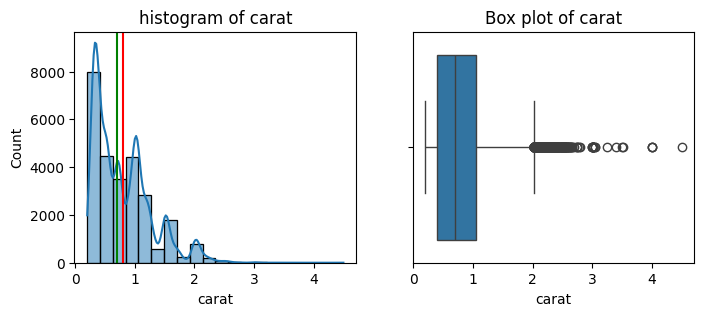

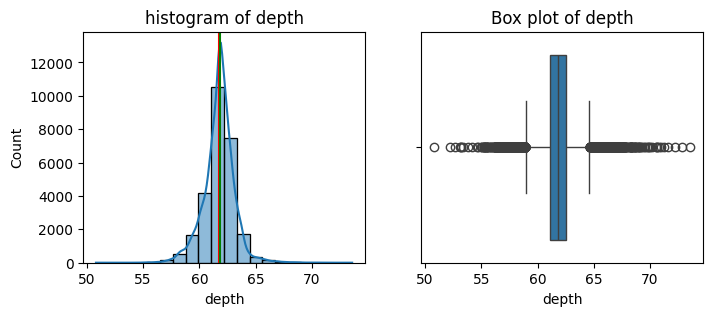

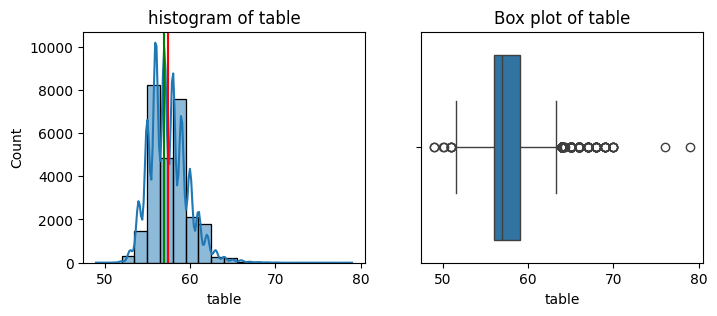

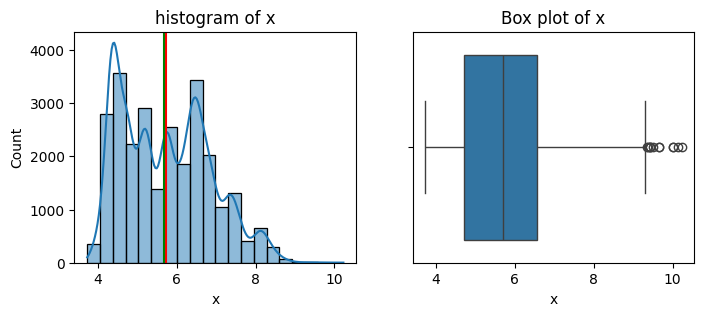

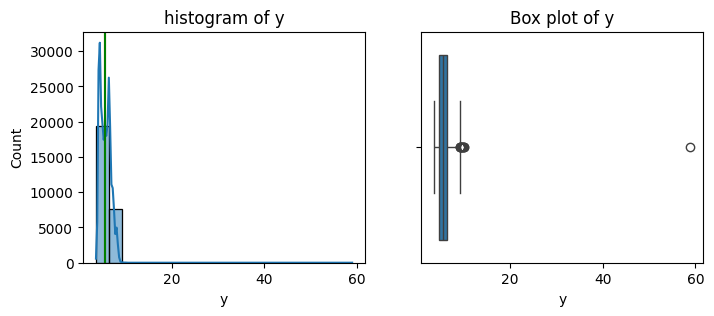

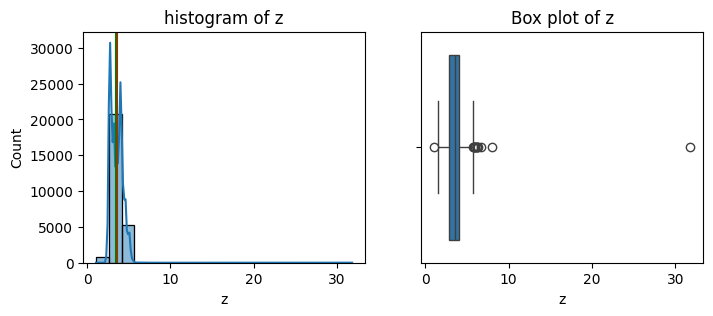

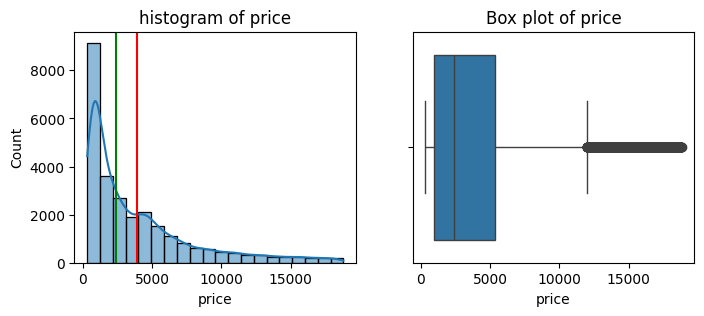

In [24]:
for col in data.select_dtypes(exclude='object'):   # graph for the numerical data avalaiable in the dataset
    uniplot(col)

## observation from the graphs
### 1) from the histogram we can observe that carat,table,y,z and prize have right skewed data 
### 2) in carat,table and price have mean greater than median
### 3) mean is not visible in y and z and median is visible or may be mean is eqaul to median
### 4)in x mean is greater than median
### 5)in depth median is greater than mean
### 6) if we see the box plot than all the outliers are uncounatble or we can say there are several outliers in all the ascpets

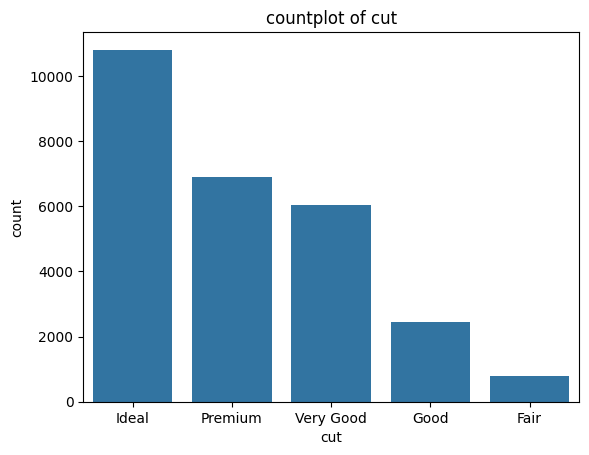

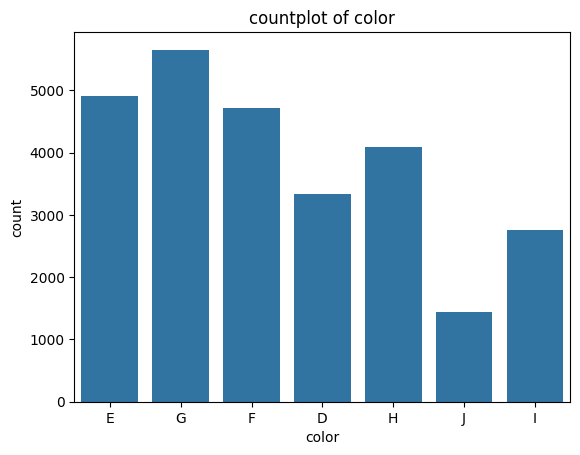

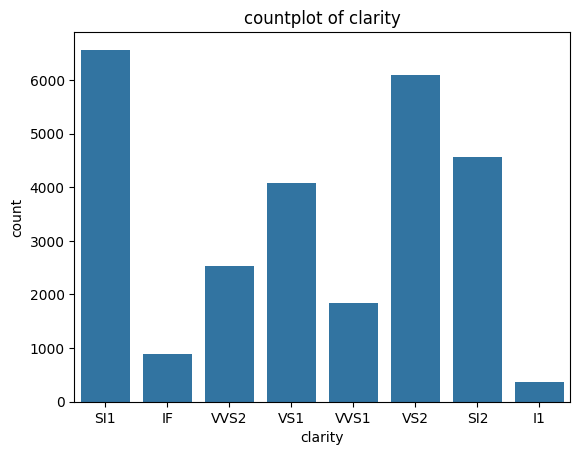

In [25]:
# Data visualization of object data using count plot
for col in data.select_dtypes(include='object'):
    sns.countplot(x=data[col])
    plt.title(f'countplot of {col}')
    plt.show()

### 1) if we see from the above plot then the ideal diamond and color g diamong also sl1 diamond are the most diamond that are sold 
### 2) also is we see about the fair with color j and clarity l1 they are sold less

## visualization of co-relation between all columns in the form of Heatmap

<Figure size 800x300 with 0 Axes>

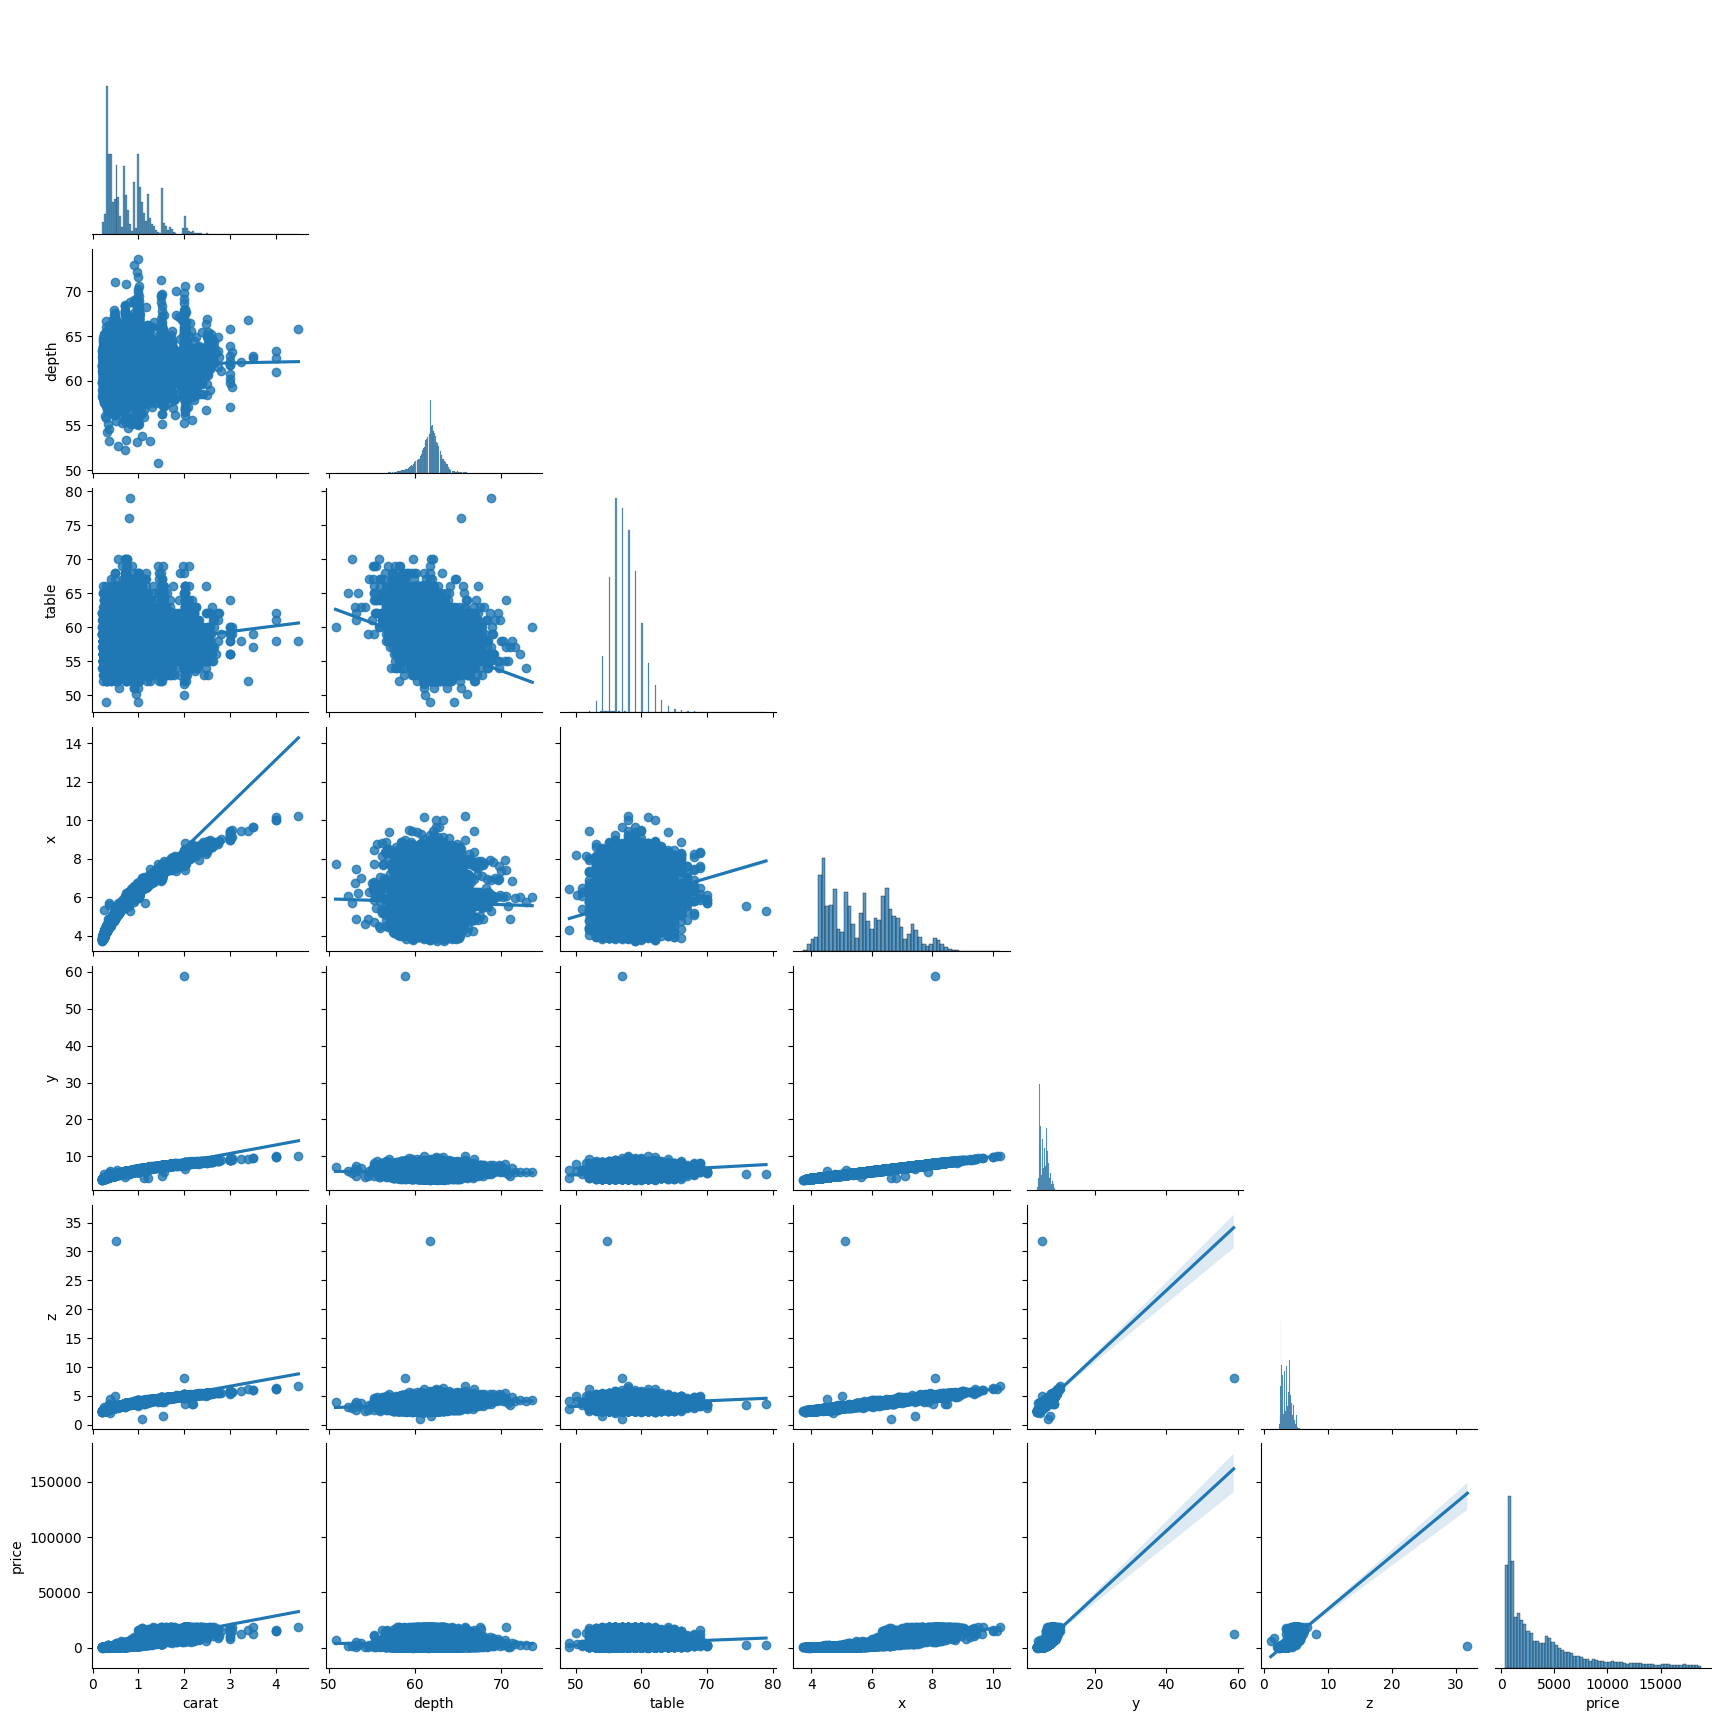

In [27]:
plt.figure(figsize=(8,3))
sns.pairplot(data,corner=True,kind='reg')

# Relation between all numerical variables and the Price
### In this code we have to predict the Price of Diamond which is dependent variable and other numerical variables  as well as catagorical variables because these are independent variables

# Bivariant data visulaisation

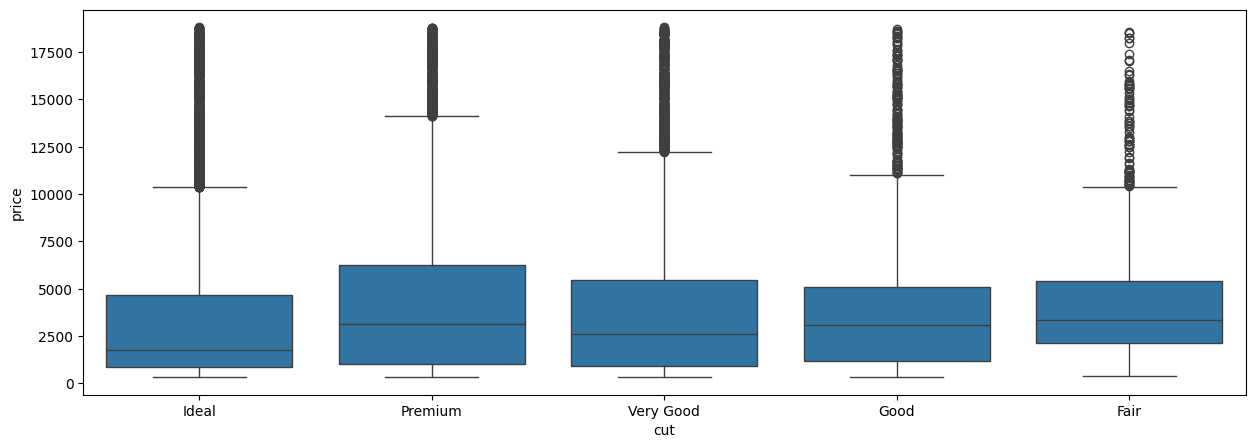

In [29]:
# Boxplot for 'cut' vs 'price'
plt.figure(figsize=[15,5])
sns.boxplot(x='cut',y='price',data=data)
plt.show()

### from this boxplot of corrleation we can see that the median of the price of premium and good are equal which tells us that they are if no use by showing them different and combine them with groupby

C:\Users\Hp\AppData\Local\Temp\ipykernel_22052\1959677972.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color',y='price',data=data, palette='rainbow')


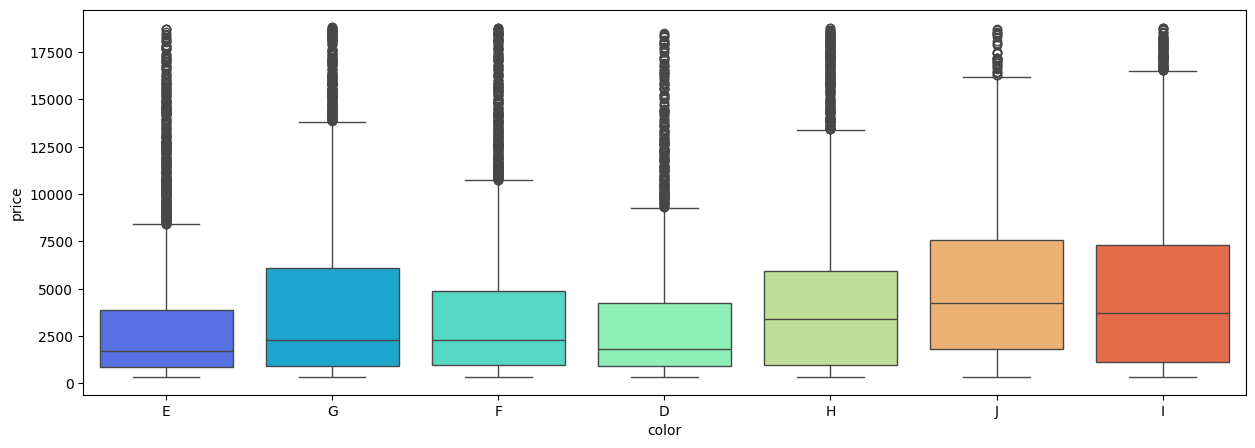

In [30]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize=[15,5])
sns.boxplot(x='color',y='price',data=data, palette='rainbow')
plt.show()

## in this boxplot we can see that the price of the e and d color have the medians equal that tells us that showing them as differnet column is of no use and same is for g and f color also same for the h and i color


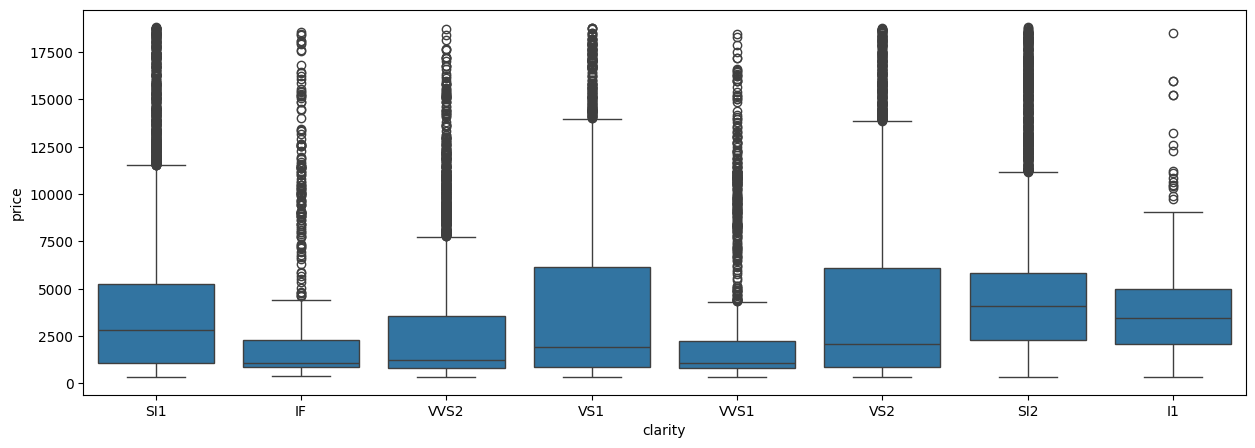

In [31]:
# Boxplot for 'clarity' vs 'price'

plt.figure(figsize=[15,5])
sns.boxplot(x='clarity',y='price',data=data)
plt.show()

### if we talk about the clarity and compare it with the price of the diamond then we can see that medians that re same and that can be romoved  or merged to as one value then those are:
#### IF AND WS1    
#### VS1 AND VS2

## scatter plot has linear relationship for the correlation of the prcie and tha carat and we can easily build a relation between both

In [33]:
import plotly.express as px     ## import plotly for 3D scatter plot

In [67]:
# Create 3D scatter plot of depth percentage vs length(x) vs price.

fig=px.scatter_3d(data,x='depth',y='x',z='price')
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'] but received: price

In [68]:
# Create 3D scatter plot of depth percentage vs width(y) vs price.
fig=px.scatter_3d(data,x='depth',y='y',z='price')
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'] but received: price

In [69]:
# Create 3D scatter plot of depth percentage vs depth(z) vs price.
fig=px.scatter_3d(data,x='depth',y='z',z='price')
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'] but received: price

In [70]:
# Create 3D scatter plot of table vs carat vs price.
fig=px.scatter_3d(data,x='table',y='carat',z='price')
fig.show()

ValueError: Value of 'z' is not the name of a column in 'data_frame'. Expected one of ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'] but received: price

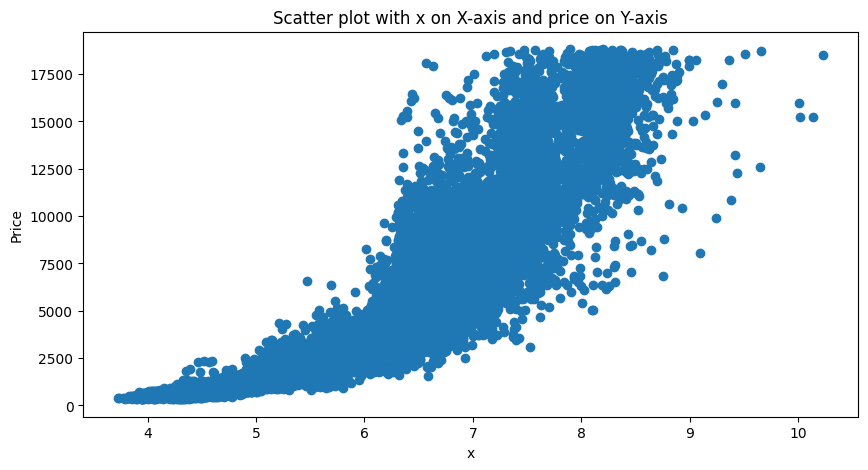

In [35]:
# Create scatter plot with attribute 'x' on X-axis and 'price' on Y-axis

plt.figure(figsize=(10,5))
plt.scatter(data['x'],data['price'])
plt.title('Scatter plot with x on X-axis and price on Y-axis')
plt.xlabel('x')
plt.ylabel('Price')
plt.show()

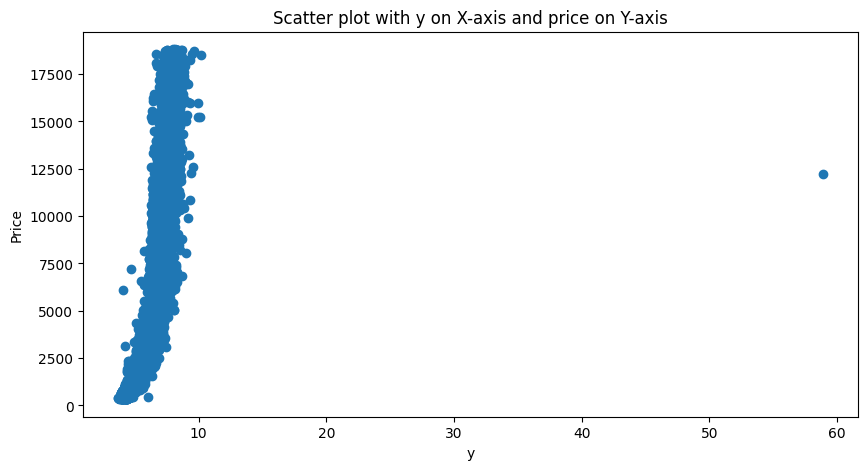

In [36]:
# Create scatter plot with attribute 'y' on X-axis and 'price' on Y-axis

plt.figure(figsize=(10,5))
plt.scatter(data['y'],data['price'])
plt.title('Scatter plot with y on X-axis and price on Y-axis')
plt.xlabel('y')
plt.ylabel('Price')
plt.show()

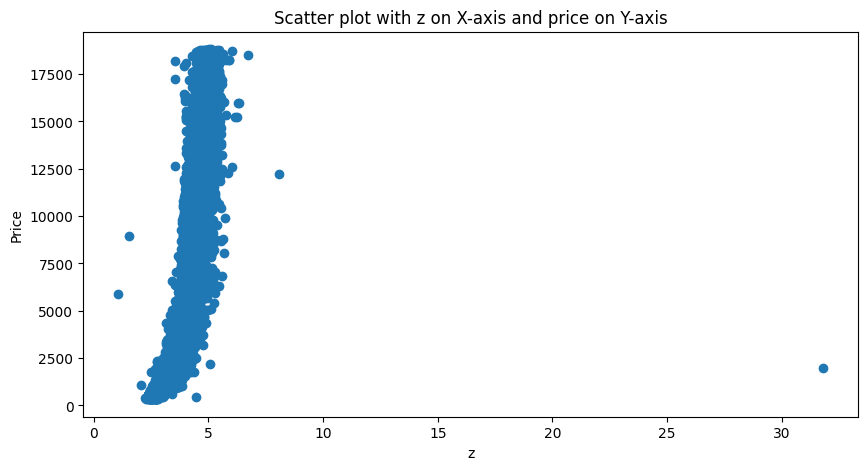

In [37]:
# Create scatter plot with 'z' on X-axis and 'price' on Y-axis

plt.figure(figsize=(10,5))
plt.scatter(data['z'],data['price'])
plt.title('Scatter plot with z on X-axis and price on Y-axis')
plt.xlabel('z')
plt.ylabel('Price')
plt.show()

### For the three dimension  we can see that the relation built through the observation from the scatter plot is parabolic relationship

# DATA ENCODING

# converting the categorical data into the numnerical data


In [41]:
for col in data.columns:
    data[col]=pd.Categorical(data[col]).codes

In [42]:
data['color'].value_counts()

color
3    5653
1    4916
2    4723
4    4095
0    3341
5    2765
6    1440
Name: count, dtype: int64

In [43]:
data['clarity'].value_counts()

clarity
2    6565
5    6093
3    4564
4    4087
7    2530
6    1839
1     891
0     364
Name: count, dtype: int64

In [44]:
data['cut'].value_counts()

cut
2    10805
3     6886
4     6027
1     2435
0      780
Name: count, dtype: int64

In [45]:
data.info()   ## all the categorical data has been converted to numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26933 entries, 0 to 26932
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   carat    26933 non-null  int16
 1   cut      26933 non-null  int8 
 2   color    26933 non-null  int8 
 3   clarity  26933 non-null  int8 
 4   depth    26933 non-null  int16
 5   table    26933 non-null  int8 
 6   x        26933 non-null  int16
 7   y        26933 non-null  int16
 8   z        26933 non-null  int16
 9   price    26933 non-null  int16
dtypes: int16(6), int8(4)
memory usage: 421.0 KB


### Finding Outliers percentage present in the numerical columns of the data

In [46]:
def outliers(col):
    q1=np.quantile(data[col],.25)
    q3=np.quantile(data[col],.75)
    iqr=q3-q1
    upper_range=q1-(1.5*iqr)
    lower_range=q3+(1.5*iqr)
    upper_count=data[data[col]>upper_range][col].count() 
    upper_percentage=round(upper_count/data.shape[0*100],2)
    lower_count=data[data[col]>lower_range][col].count() 
    lower_percentage=round(lower_count/data.shape[0*100],2)
    return print(f'the outlier percenatge of {col} for lower_range is { lower_percentage},for upper_range is {upper_percentage}')

In [47]:
for i in data.select_dtypes(exclude='object'):
    outliers(i)

the outlier percenatge of carat for lower_range is 0.02,for upper_range is 1.0
the outlier percenatge of cut for lower_range is 0.0,for upper_range is 0.97
the outlier percenatge of color for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of clarity for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of depth for lower_range is 0.02,for upper_range is 0.96
the outlier percenatge of table for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of x for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of y for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of z for lower_range is 0.0,for upper_range is 1.0
the outlier percenatge of price for lower_range is 0.0,for upper_range is 1.0


### Removal of Outliers

In [48]:
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lower_range= q1-(1.5 * iqr)
    upper_range= q3+(1.5 * iqr)
    return lower_range, upper_range

In [49]:
## This is a loop to treat outliers for all the non-'object' type varible

for column in data.columns:
     if data[column].dtype != 'object': 
        lr,ur=remove_outlier(data[column])
        data[column]=np.where(data[column]>ur,ur,data[column])
        data[column]=np.where(data[column]<lr,lr,data[column])

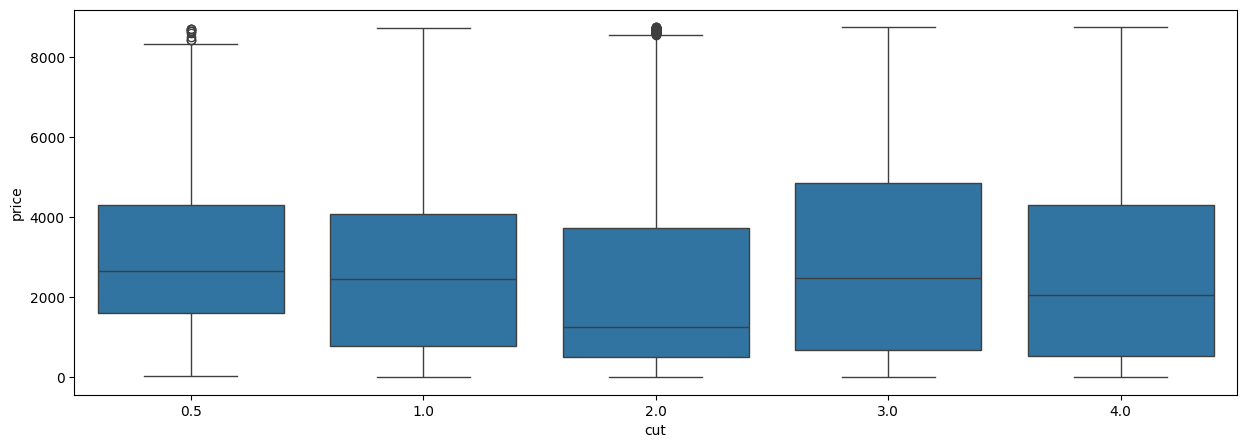

In [50]:
plt.figure(figsize=[15,5])
sns.boxplot(x='cut',y='price',data=data)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_22052\1959677972.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




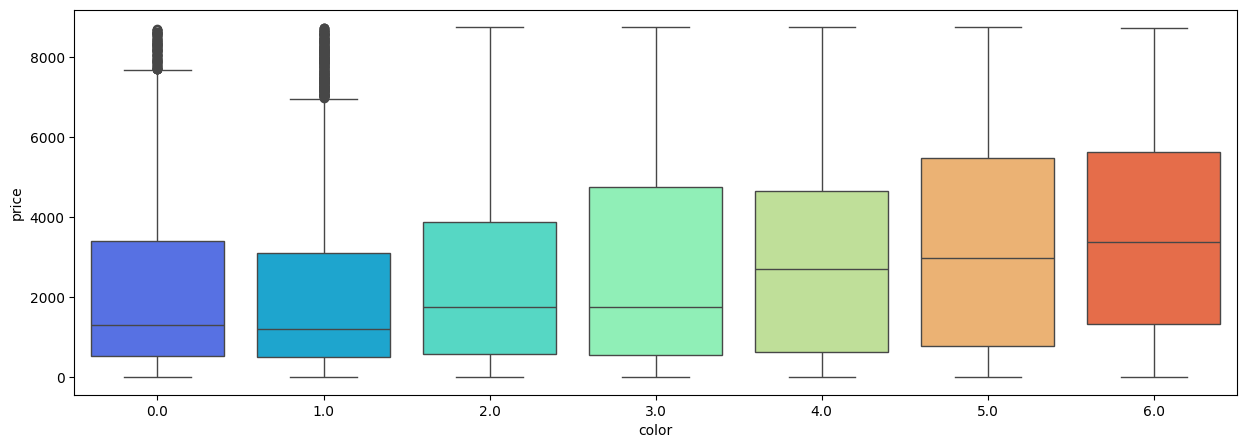

In [51]:
# Boxplot for 'color' vs 'price'
plt.figure(figsize=[15,5])
sns.boxplot(x='color',y='price',data=data, palette='rainbow')
plt.show()

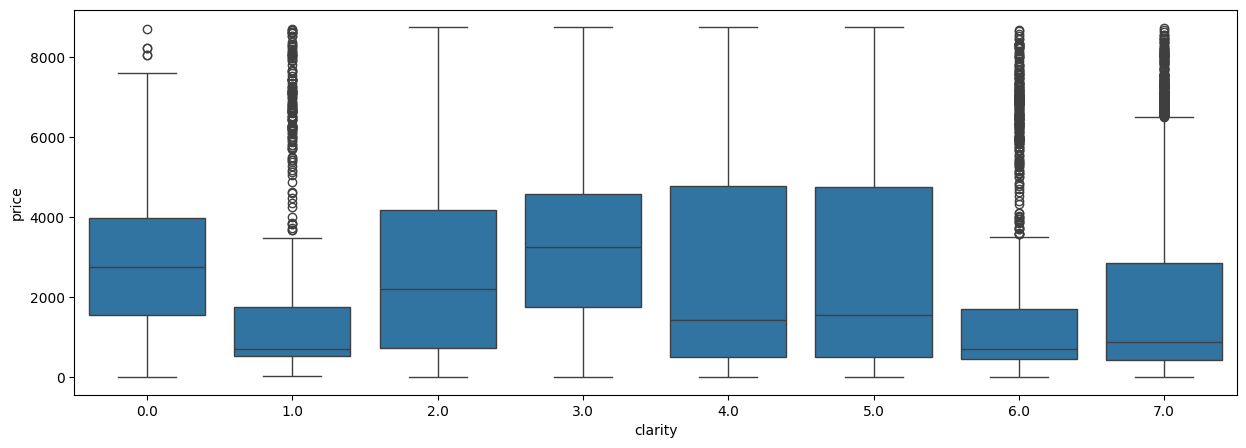

In [52]:

plt.figure(figsize=[15,5])
sns.boxplot(x='clarity',y='price',data=data)
plt.show()

## Spling of dataset into dependent and indipendent variables

In [53]:
X = data.drop('price',axis=1)

In [54]:
y= data.pop('price') 

In [55]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,10.0,2.0,1.0,2.0,80.0,56.0,50.0,51.0,43.0
1,13.0,3.0,3.0,1.0,67.0,56.0,65.0,68.0,47.0
2,70.0,4.0,1.0,7.0,81.0,75.0,227.0,234.0,155.0
3,22.0,2.0,2.0,4.0,75.0,36.0,105.0,102.0,73.0
4,11.0,2.0,2.0,6.0,63.0,66.0,58.0,65.0,42.0


## Testing and Training of data`

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test=train_test_split( X, y, test_size=0.33, random_state=42)

In [59]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
23676,10.0,2.0,3.0,4.0,77.0,26.0,56.0,53.0,44.0
18547,50.0,2.0,5.0,5.0,80.0,22.0,191.0,194.0,131.0
26577,91.0,2.0,3.0,2.0,78.0,46.0,286.0,288.0,188.0
7097,22.0,1.0,4.0,2.0,91.0,56.0,100.0,101.0,79.0
24341,70.0,1.0,3.0,7.0,85.0,56.0,233.0,235.0,160.0


In [60]:
print(X_test.shape) 
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(8888, 9)
(18045, 9)
(8888,)
(18045,)


### importing of Linear Regression model from sklearn.linear_model for perform linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr=LinearRegression()

In [63]:
lr=lr.fit(X_train,y_train)      

In [64]:
lr.coef_

array([  40.95360306,   31.51791203, -154.63389699,  162.37145149,
          2.32004942,   -3.86832254,   -6.27498769,   15.4168756 ,
         -6.55697485])

### Checking of Score of the Training and Testing 

In [65]:
lr.score(X_train,y_train)*100

93.09103164871246

In [66]:
lr.score(X_test,y_test)*100

93.26861887947871

In [71]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
3916,21.0,3.0,3.0,5.0,77.0,66.0,99.0,94.0,70.0
10434,11.0,4.0,5.0,6.0,81.0,75.0,53.0,54.0,45.0
24210,21.0,2.0,6.0,5.0,76.0,26.0,102.0,103.0,73.0
9586,7.0,4.0,1.0,7.0,49.0,85.0,50.0,52.0,28.0
7449,104.0,3.0,0.0,2.0,83.0,66.0,305.0,308.0,204.0


In [72]:
y_predict=lr.predict(X_test)

In [73]:
abs(y_predict-y_test) ###y_predict-----> predicted value\ y_test----> it is the actual value

3916      64.797930
10434    293.348315
24210    162.451312
9586     306.279289
7449     350.011959
            ...    
10444    232.949904
25852    766.997989
5151     288.811538
9625     183.533099
18185    439.556600
Name: price, Length: 8888, dtype: float64

## Model Evaluation

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [75]:
mae= mean_absolute_error(y_test,y_predict)

In [76]:
print(mae)

462.6212064256104


In [77]:
mse=mean_squared_error(y_test,y_predict)

In [78]:
print(mse)

392819.70774333214


In [79]:
rmse=np.sqrt((mean_absolute_error(y_test,y_predict)))

In [80]:
print(rmse)

21.508630975159956


In [81]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
3916,21.0,3.0,3.0,5.0,77.0,66.0,99.0,94.0,70.0
10434,11.0,4.0,5.0,6.0,81.0,75.0,53.0,54.0,45.0
24210,21.0,2.0,6.0,5.0,76.0,26.0,102.0,103.0,73.0
9586,7.0,4.0,1.0,7.0,49.0,85.0,50.0,52.0,28.0
7449,104.0,3.0,0.0,2.0,83.0,66.0,305.0,308.0,204.0


In [82]:
col=data.columns
col

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [83]:
val=[]
values=[]

l0=int(input('Enter the value of carat: '))
values.append(l0)

print('cut')
print('Enter 0 for Fair')
print('Enter 1 for Good')
print('Enter 2 for Ideal')
print('Enter 3 for Premium')
print('Enter 4 for Very good')
l1=int(input('Enter the value of cut: '))
values.append(l1)

print('color')
print('Enter 0 for D')
print('Enter 1 for E')
print('Enter 2 for F')
print('Enter 3 for G')
print('Enter 4 for H')
print('Enter 5 for I')
print('Enter 6 for J')
l2=int(input('Enter the value of color: '))
values.append(l2)

print('clarity')
print('Enter 0 for I1')
print('Enter 1 for IF')
print('Enter 2 for SI1')
print('Enter 3 for SI2')
print('Enter 4 for VS2')
print('Enter 5 for VVS1')
print('Enter 6 for VVS2')
l3=float(input('Enter the value of clarity: '))
values.append(l3)

l4=int(input('Enter the value of depth: '))
values.append(l4)

l5=int(input('Enter the value of table: '))
values.append(l5)

l6=int(input('Enter the value of length(x): '))
values.append(l6)

l7=int(input('Enter the value of width(y): '))
values.append(l7)

l8=int(input('Enter the value of depth(z): '))
values.append(l8)


#new_price=lr.predict(values)
#print('predicted new price for above values is %1.3f'%new_price)

cut
Enter 0 for Fair
Enter 1 for Good
Enter 2 for Ideal
Enter 3 for Premium
Enter 4 for Very good
color
Enter 0 for D
Enter 1 for E
Enter 2 for F
Enter 3 for G
Enter 4 for H
Enter 5 for I
Enter 6 for J
clarity
Enter 0 for I1
Enter 1 for IF
Enter 2 for SI1
Enter 3 for SI2
Enter 4 for VS2
Enter 5 for VVS1
Enter 6 for VVS2


In [84]:
val.append(values)

In [85]:
val

[[30, 30, 30, 30.0, 30, 30, 30, 30, 30]]

In [86]:
test=pd.DataFrame(val,columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
test

,carat,cut,color,clarity,depth,table,x,y,z
0,30,30,30,30.0,30,30,30,30,30


In [87]:
new_price=lr.predict(test)
print('predicted new price for above values is ',new_price)

predicted new price for above values is  [1468.72958541]


In [88]:
val

[[30, 30, 30, 30.0, 30, 30, 30, 30, 30]]

In [89]:
print (test.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')


In [90]:
import pickle

In [91]:
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)

print("Model saved successfully!")

Model saved successfully!
